# Correlation and Experimental Design

In [26]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Relationships between two variables

 We can visualize  relationships between numeric variables with scatter plots. The variable on the x-axis is called the explanatory or independent variable, and the variable on the y-axis is called the response or dependent variable.

### Correlation coefficient

We can also examine relationships between two numeric variables using a number called the _correlation coefficient_. This is a number between -1 and 1, where the magnitude corresponds to the strength of the relationship between the variables, and the sign, positive or negative, corresponds to the direction of the relationship.



In [27]:
# load data
world_happiness = pd.read_csv('world_happiness.csv', index_col=0)

2019 World Happiness Report. The report scores various countries based on how happy people in that country are. It also ranks each country on various societal aspects such as social support, freedom, corruption, and others. The dataset also includes the GDP per capita and life expectancy for each country.

In [28]:
# info
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 1 to 143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 10.1+ KB


In [29]:
# head 
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


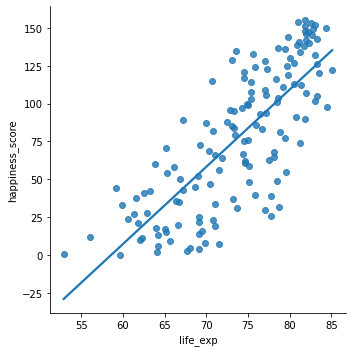

In [30]:
# Examine the relationship between a country's life expectancy (life_exp) and happiness score (happiness_score) 
# both visually and quantitatively. 

sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None);
plt.show()

In [31]:
# Calculate the correlation between life_exp and happiness_score. Save this as cor.
cor = world_happiness['happiness_score'].corr(world_happiness['life_exp'])
print(cor)

0.7802249053272063


## Correlation Caveats

While correlation is a useful way to quantify relationships, there are some caveats:

1. The Correlation co efficient measures the strength of linear relationships, and linear relationships only. Just like any summary statistic, correlation shouldn't be used blindly, and you should always visualize your data when possible.

What can't correlation measure?

While the correlation coefficient is a convenient way to quantify the strength of a relationship between two variables, it's far from perfect. In this exercise, you'll explore one of the caveats of the correlation coefficient by examining the relationship between a country's GDP per capita (gdp_per_cap) and happiness score.

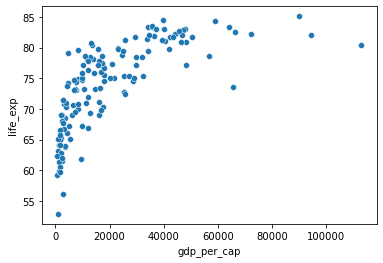

In [32]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap', y='life_exp', data=world_happiness)

# Show plot
plt.show()

In [33]:
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

0.7019547642148014


The correlation between GDP per capita and life expectancy is 0.7. Why is correlation not the best way to measure the relationship between these two variables?


Correlation only measures linear relationships.

### Transforming variables

When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable so that correlation can be computed. In this exercise, you'll perform a transformation yourself.

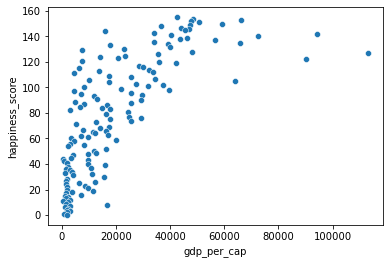

0.7279733012222975


In [34]:
# Create a scatterplot of happiness_score versus gdp_per_cap and calculate the correlation between them.

# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='gdp_per_cap', y='happiness_score', data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

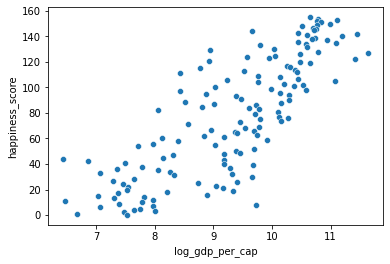

0.8043146004918291


In [35]:
# Add a new column to world_happiness called log_gdp_per_cap that contains the log of gdp_per_cap.
# Create a seaborn scatterplot of log_gdp_per_cap and happiness_score and calculate the correlation between them.

# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap', y='happiness_score',data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

The relationship between GDP per capita and happiness became more linear by applying a log transformation. Log transformations are great to use on variables with a skewed distribution, such as GDP.

### Cofounder

A Confounder is a variable whose presence affects the variables being studied so that the results do not reflect the actual relationship. 

A study is investigating the relationship between neighborhood residence and lung capacity. Researchers measure the lung capacity of thirty people from neighborhood A, which is located near a highway, and thirty people from neighborhood B, which is not near a highway. Both groups have similar smoking habits and a similar gender breakdown.

Which of the following could be a confounder in this study?

Air pollution is the co founder. You would expect there to be more air pollution in the neighborhood situated near the highway, which can cause lower lung capacity.

lung capacity is the response variable being studied.

neighborhood is the explanatory variable being studied.

## Design of experiments

Design of experiments
Often, data is created as a result of a study that aims to answer a specific question. However, data needs to be analyzed and interpreted differently depending on how the data was generated and how the study was designed.

Experiments generally aim to answer a question in the form,

_"What is the effect of the treatment on the response?"_ 
 
In this setting, 

**treatment** refers to the explanatory or independent variable, and 

**response** refers to the response or dependent variable.

For example, what is the effect of an advertisement on the number of products purchased? In this case, the treatment is an advertisement, and the response is the number of products purchased.

### Controlled experiments

In a controlled experiment, participants are randomly assigned to either the treatment group or the control group, where the treatment group receives the treatment and the control group does not.

A great example of this is an **A/B test**. In our example, the treatment group will see an advertisement, and the control group will not. Other than this difference, the groups should be comparable so that we can determine if seeing an advertisement causes people to buy more. 

If the groups aren't comparable, this could lead to confounding, or bias. If the average age of participants in the treatment group is 25 and the average age of participants in the control group is 50, age could be a potential confounder if younger people are more likely to purchase more, and this will make the experiment biased towards the treatment.

### The gold standard of experiments will use...
The gold standard, or ideal experiment, will eliminate as much bias as possible by using certain tools. The first tool to help eliminate bias in controlled experiments is to use 

1. a randomized controlled trial. In a randomized controlled trial, participants are randomly assigned to the treatment or control group and their assignment isn't based on anything other than chance. Random assignment like this helps ensure that the groups are comparable. 

2. The second way is to use a placebo, which is something that resembles the treatment, but has no effect. This way, participants don't know if they're in the treatment or control group. This ensures that the effect of the treatment is due to the treatment itself, not the idea of getting the treatment. This is common in clinical trials that test the effectiveness of a drug. The control group will still be given a pill, but it's a sugar pill that has minimal effects on the response.

3. In a double-blind experiment, the person administering the treatment or running the experiment also doesn't know whether they're administering the actual treatment or the placebo. This protects against bias in the response as well as the analysis of the results. 

These different tools all boil down to the same principle: if there are fewer opportunities for bias to creep into your experiment, the more reliably you can conclude whether the treatment affects the response.

### Observational studies

In an observational study, participants are not randomly assigned to groups. Instead, participants assign themselves, usually based on pre-existing characteristics. This is useful for answering questions that aren't conducive to a controlled experiment. If you want to study the effect of smoking on cancer, you can't force people to start smoking. Similarly, if you want to study how past purchasing behavior affects whether someone will buy a product, you can't force people to have certain past purchasing behavior. Because assignment isn't random, there's no way to guarantee that the groups will be comparable in every aspect, so observational studies can't establish causation, only association. 

The effects of the treatment may be confounded by factors that got certain people into the control group and certain people into the treatment group. However, there are ways to control for confounders, which can help strengthen the reliability of conclusions about association.

###  Longitudinal vs. cross-sectional studies
The final important distinction to make is between longitudinal and cross-sectional studies.

In a longitudinal study, the same participants are followed over a period of time to examine the effect of treatment on the response. 

In a cross-sectional study, data is collected from a single snapshot in time. 

If you wanted to investigate the effect of age on height, a cross-sectional study would measure the heights of people of different ages and compare them. However, the results will be confounded by birth year and lifestyle since it's possible that each generation is getting taller. In a longitudinal study,the same people would have their heights recorded at different points in their lives, so the confounding is eliminated. It's important to note that longitudinal studies are more expensive, and take longer to perform, while cross-sectional studies are cheaper, faster, and more convenient.